# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot
#import os


In [2]:
%matplotlib inline


### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

In [3]:
datapoints_data = pd.read_csv('datapoints.csv')
datatypes_data = pd.read_csv('datatypes.csv')
nodes_data = pd.read_csv('nodes.csv')
sensors_data = pd.read_csv('sensors.csv')
#volcanos_data = pd.read_csv('volcanos.csv') 

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [4]:
datapoints_data['timestamp'] =pd.to_datetime(datapoints_data['timestamp'])
nodes_data['created_at'] =pd.to_datetime(nodes_data['created_at'])
nodes_data['updated_at'] =pd.to_datetime(nodes_data['updated_at'])
sensors_data['created_at'] =pd.to_datetime(sensors_data['created_at'])
sensors_data['updated_at'] =pd.to_datetime(sensors_data['updated_at'])
#volcanos_data['created_at'] =pd.to_datetime(volcanos_data['created_at'])
#volcanos_data['updated_at'] =pd.to_datetime(volcanos_data['updated_at'])

Convert Data frame index to match & merge

In [5]:
datapoints_data.head()

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25,763701a1-8679-11e6-a353-2f6c041e2491


In [6]:
datapoints_data_new = datapoints_data.loc[:, ['timestamp', 'sensor_id', 'value']]

In [7]:
datapoints_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 3 columns):
timestamp    176534 non-null datetime64[ns]
sensor_id    176534 non-null object
value        63456 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.0+ MB


In [8]:
datapoints_data_new.head()

,timestamp,sensor_id,value
0,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,98.000
1,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491,33.198
2,2016-08-03 04:39:25,763ca6f0-8679-11e6-a353-2f6c041e2491,29.300
3,2016-08-03 04:39:25,763d9150-8679-11e6-a353-2f6c041e2491,96893.110
4,2016-08-03 04:39:25,763701a1-8679-11e6-a353-2f6c041e2491,459.736


In [9]:
datatypes_data.head()

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S


In [10]:
datatypes_data_new = datatypes_data.loc[:, ['id', 'type', 'si_unit']]

In [11]:
datatypes_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
id         7 non-null object
type       7 non-null object
si_unit    7 non-null object
dtypes: object(3)
memory usage: 248.0+ bytes


In [12]:
datatypes_data_new.head()

,id,type,si_unit
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm


In [13]:
datatypes_data_new.rename(columns={'id':'data_type_id'},inplace=True)

In [14]:
datatypes_data_new.head()

,data_type_id,type,si_unit
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm


In [15]:
nodes_data.head()

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49,2016-09-29 19:28:05.932,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.065,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40,2016-09-29 19:20:17.417,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25,2016-09-29 19:20:17.431,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.523,35dc3e90-8679-11e6-bda3-ef77801087ee


In [16]:
nodes_data_new = nodes_data.loc[:, ['id', 'name']]

In [17]:
nodes_data_new.rename(columns={'id':'node_id'},inplace=True)

In [18]:
nodes_data_new.head()

,node_id,name
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9
2,76309900-8679-11e6-a353-2f6c041e2491,N8
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2


In [19]:
sensors_data.head()

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.797,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.811,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [20]:
sensors_data_new = pd.DataFrame(sensors_data.loc[:,['id', 'data_type_id', 'node_id']])

In [21]:
sensors_data_new.head()

,id,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [22]:
sensors_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
id              61 non-null object
data_type_id    61 non-null object
node_id         61 non-null object
dtypes: object(3)
memory usage: 1.5+ KB


In [23]:
sensors_n = pd.merge(sensors_data_new,nodes_data_new,how='outer',on='node_id')

In [24]:
sensors_n.head()

,id,data_type_id,node_id,name
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9
1,c159c730-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9
2,c159ee40-8679-11e6-a353-2f6c041e2491,35dcdad1-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9
3,c15a6371-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9
4,c15a6372-8679-11e6-a353-2f6c041e2491,35dcb3c1-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9


In [25]:
sensors_1 = pd.merge(sensors_n,datatypes_data_new,how='outer',on='data_type_id')

In [26]:
sensors_1.head()

,id,data_type_id,node_id,name,type,si_unit
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,N9,carbon dioxide concentration,ppm
1,763701a1-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,carbon dioxide concentration,ppm
2,7636da90-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,N7,carbon dioxide concentration,ppm
3,76427351-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,N8,carbon dioxide concentration,ppm
4,c5e881a0-867a-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,carbon dioxide concentration,ppm


In [27]:
sensors_2 = pd.DataFrame(sensors_1.loc[:,['id', 'name', 'type']])

In [28]:
sensors_2.rename(columns={'id':'sensor_id'},inplace=True)

In [29]:
sensors_2.head()

,sensor_id,name,type
0,c15a6370-8679-11e6-a353-2f6c041e2491,N9,carbon dioxide concentration
1,763701a1-8679-11e6-a353-2f6c041e2491,N10,carbon dioxide concentration
2,7636da90-8679-11e6-a353-2f6c041e2491,N7,carbon dioxide concentration
3,76427351-8679-11e6-a353-2f6c041e2491,N8,carbon dioxide concentration
4,c5e881a0-867a-11e6-a353-2f6c041e2491,N1,carbon dioxide concentration


In [30]:
data_1 = pd.merge(datapoints_data_new,sensors_2,how='outer',on='sensor_id')

In [31]:
data_fin =  pd.DataFrame(data_1.loc[:,['timestamp', 'type', 'name', 'value']])

In [32]:
data_fin.rename(columns={'timestamp':'Time'},inplace=True)

Final Data

In [33]:
data_fin.set_index(data_fin['Time'],inplace=True)
data_fin.drop(columns=['Time'],inplace=True)

In [34]:
data_fin = data_fin.replace(np.nan, 0)

In [35]:
data_fin.isnull().sum()

type     0
name     0
value    0
dtype: int64

In [36]:
data_fin.head()

,type,name,value
Time,,,
2016-08-03 04:39:25,battery,N10,98.0
2016-08-03 04:47:41,battery,N10,98.0
2016-08-03 05:08:52,battery,N10,98.0
2016-08-03 05:14:08,battery,N10,98.0
2016-08-03 05:28:55,battery,N10,96.0


Did not use this below

In [37]:
#data_dir = 'data/Volcano'

In [38]:
#_files = os.listdir(data_dir)

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [39]:
data_piv = data_fin.pivot_table(index="Time", columns="type").reset_index()

In [40]:
data_piv.head()

Time  value                                                \
type                       RSAM battery carbon dioxide concentration humidity   
0    2016-07-01 00:00:31  455.0     NaN                          NaN      NaN   
1    2016-07-01 00:10:02  213.0     NaN                          NaN      NaN   
2    2016-07-01 00:20:00  225.0     NaN                          NaN      NaN   
3    2016-07-01 00:30:01  321.0     NaN                          NaN      NaN   
4    2016-07-01 00:40:00  429.0     NaN                          NaN      NaN   

                                                          
type hydrogen sulfide concentration pressure temperature  
0                               NaN      NaN         NaN  
1                               NaN      NaN         NaN  
2                               NaN      NaN         NaN  
3                               NaN      NaN         NaN  
4                               NaN      NaN         NaN

#### Battery

In [41]:
data_b = data_fin.loc[data_fin['type']=="battery"]

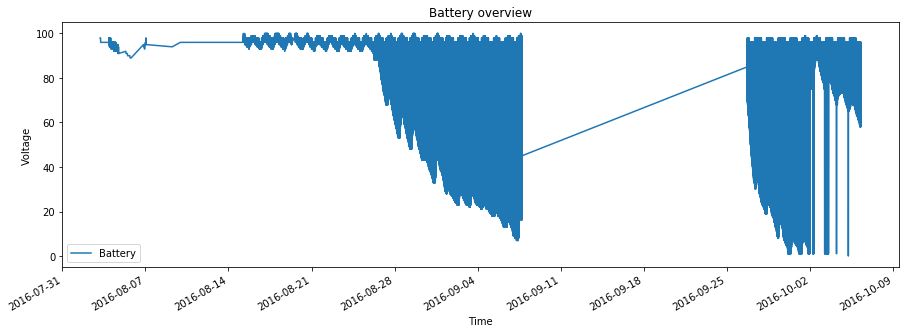

In [42]:
ts = pd.Series(data_b.value,index=data_b.index)
ts.plot(figsize=(15,5), label='Battery')
plt.legend(loc='best')
plt.title('Battery overview')
plt.ylabel('Voltage')
plt.show()
plt.savefig('Vol_Battery.png', bbox_inches='tight')

##### From the Battery plot, I can tell that all the instruments battery voltage was constant but on the 06th  of September there was an occurrence that effected all of the batteries witch a sharp decline in the voltage that then recovered to normal levels in about 20 days

#### Carbon Dioxide

In [43]:
data_co = data_fin.loc[data_fin['type']=="carbon dioxide concentration"]

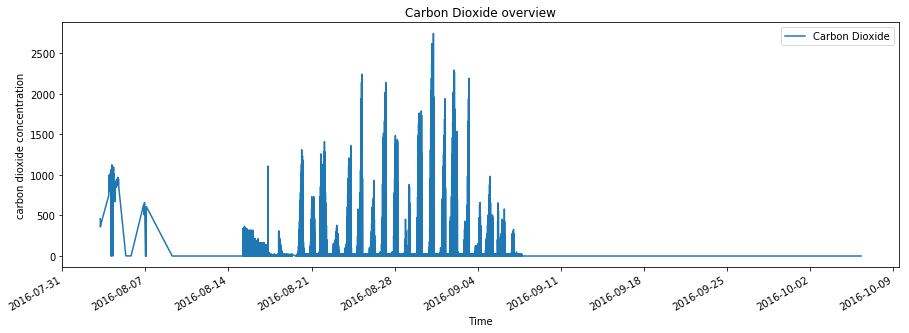

In [44]:
ts = pd.Series(data_co.value,index=data_co.index)
ts.plot(figsize=(15,5), label='Carbon Dioxide')
plt.legend(loc='best')
plt.title('Carbon Dioxide overview')
plt.ylabel('carbon dioxide concentration')
plt.show()
plt.savefig('Vol_Carbon_Dioxide.png', bbox_inches='tight')

##### From the Carbon Dioxide graph, I can tell there was a buildup of carbon a month before an event and then after this a steady spiking increase of carbon around the volcano. at about the same time as the sudden battery voltage drop the carbon emissions also decline to zero.

#### Humidity

In [45]:
data_h = data_fin.loc[data_fin['type']=="humidity"]

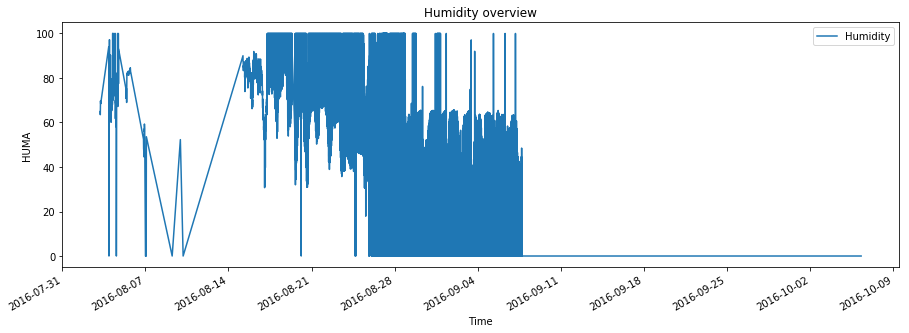

In [46]:
ts = pd.Series(data_h.value,index=data_h.index)
ts.plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity overview')
plt.ylabel('HUMA')
plt.show()
plt.savefig('Vol_Humidity.png', bbox_inches='tight')

##### Like the carbon emissions but much higher values the Humidity is high and suddenly decreases and then sharply increases again. this holds steady for about 20 days and then also suddenly drops off. I am starting to think that the instrumentation was damaged after this event that occurred.

#### Hydrogen Sulfide

In [47]:
data_hs = data_fin.loc[data_fin['type']=="hydrogen sulfide concentration"]

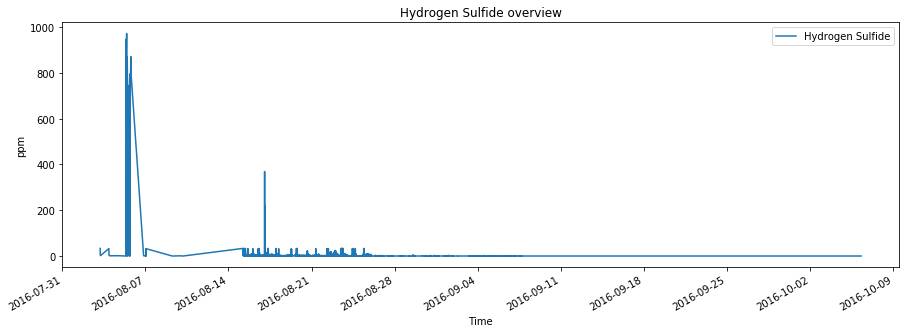

In [48]:
ts = pd.Series(data_hs.value,index=data_hs.index)
ts.plot(figsize=(15,5), label='Hydrogen Sulfide')
plt.legend(loc='best')
plt.title('Hydrogen Sulfide overview')
plt.ylabel('ppm')
plt.show()
plt.savefig('Vol_Hydrogen_Sulfide.png', bbox_inches='tight')

##### The Hydrogen Sulfide graph is very different to the others in that we have a spike in the first quarter of the period measured and then very little happens after this event. IT seems that the instrumentation also failed after a certain point in time.

#### Pressure

In [49]:
data_p = data_fin.loc[data_fin['type']=="pressure"]

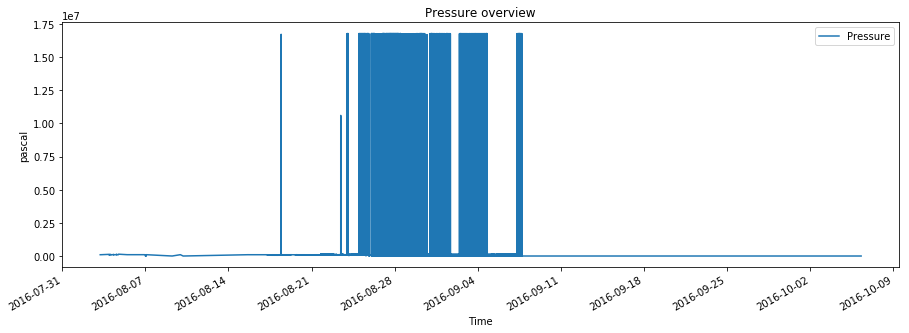

In [50]:
ts = pd.Series(data_p.value,index=data_p.index)
ts.plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure overview')
plt.ylabel('pascal')
plt.show()
plt.savefig('Vol_Pressure.png', bbox_inches='tight')

##### The Pressure graph is great. I can see no pressure and then days before the event date we see high pressure values and then after the event no / zero pressure, indicating to me that again the sensors might have been destroyed.

#### Temperature

In [51]:
data_t = data_fin.loc[data_fin['type']=="temperature"]

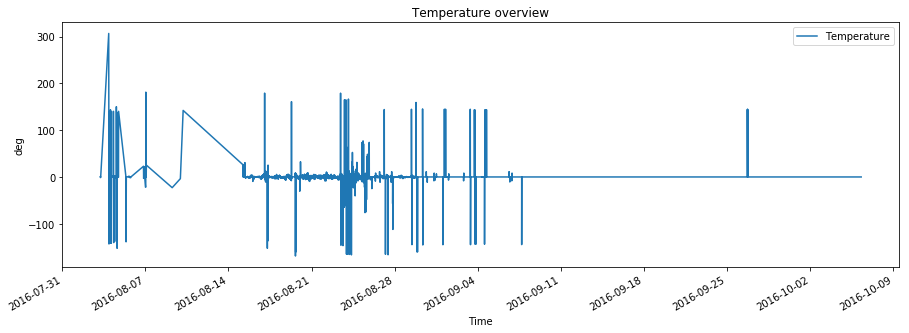

In [52]:
ts = pd.Series(data_t.value,index=data_t.index)
ts.diff().plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature overview')
plt.ylabel('deg')
plt.show()

#plt.figure.savefig('Vol_Temperature.png')
plt.savefig('Vol_Temperature.png', bbox_inches='tight')

##### I would have expected a different graph here with the temperature sensors with them being placed around a volcano. I tough they would have all been in the positive 'HOT' region, but this is not the case. I can see the temperature ranges from +300 to -100 deg C. These very high temperature swings occur throughout the first half of the period measured, then drop to zero and toward the end there is a spike in measured temperature (don’t know if this all or just a view reading from a view active surviving sensors)

### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [53]:
#s2.type_id.value_counts()

### Thier are 70 sensors

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [54]:
#full = pd.merge(data, s2, left_on='sensor_id', right_on='id_x')

In [55]:
data_fin.head()

,type,name,value
Time,,,
2016-08-03 04:39:25,battery,N10,98.0
2016-08-03 04:47:41,battery,N10,98.0
2016-08-03 05:08:52,battery,N10,98.0
2016-08-03 05:14:08,battery,N10,98.0
2016-08-03 05:28:55,battery,N10,96.0


##### My thoughts:
By merging all the info into one data frame and also removing the node data, we are left with 7 sensors data. We are able to review all the sensors hopefully more easily.

-----

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

In [56]:
#data = data_fin.reset_index()
data = data_fin

#### Battery - daily time series overview 

In [57]:
batt = data.loc[data['type']=="battery"]

In [58]:
batt_by_day = batt.resample('D')

In [59]:
batt_by_day = batt.reset_index()
del batt_by_day['type']

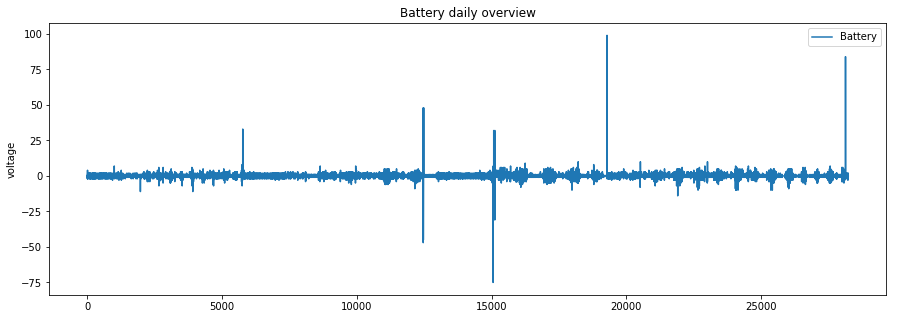

In [60]:
ts = pd.Series(batt_by_day.value,index=batt_by_day.index)
ts.diff().plot(figsize=(15,5), label='Battery')
plt.legend(loc='best')
plt.title('Battery daily overview')
plt.ylabel('voltage')
plt.show()

plt.savefig('Vol_Battery_daily.png', bbox_inches='tight')

In [61]:
batt_by_day.agg([pd.np.min, pd.np.max, pd.np.mean])

,Time,name,value
amax,2016-10-06 07:32:51,N9,100.000000
amin,2016-08-03 04:39:25,N1,0.000000
mean,NaT,NaN,62.301374


#### Humidity - daily time series overview 

In [62]:
hum = data.loc[data['type']=="humidity"]

In [63]:
hum_by_day = hum.resample('D')

In [64]:
hum_by_day = hum.reset_index()
del hum_by_day['type']

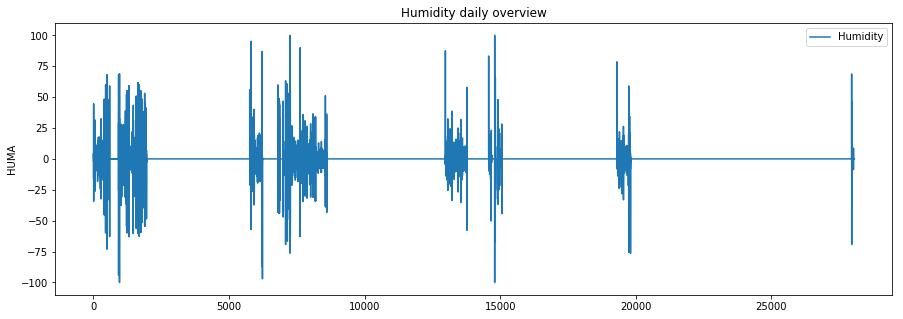

In [65]:
ts = pd.Series(hum_by_day.value,index=hum_by_day.index)
ts.diff().plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity daily overview')
plt.ylabel('HUMA')
plt.show()

plt.savefig('Vol_Humidity_daily.png', bbox_inches='tight')

In [66]:
hum_by_day.agg([pd.np.min, pd.np.max, pd.np.mean])

,Time,name,value
amax,2016-10-06 07:32:51,N9,100.000000
amin,2016-08-03 04:39:25,N1,0.000000
mean,NaT,NaN,15.027825


#### Hydrogen Sulfide - daily time series overview 

In [67]:
hs = data.loc[data['type']=="hydrogen sulfide concentration"]

In [68]:
hs_by_day = hs.resample('D')

In [69]:
hs_by_day = hs.reset_index()
del hs_by_day['type']

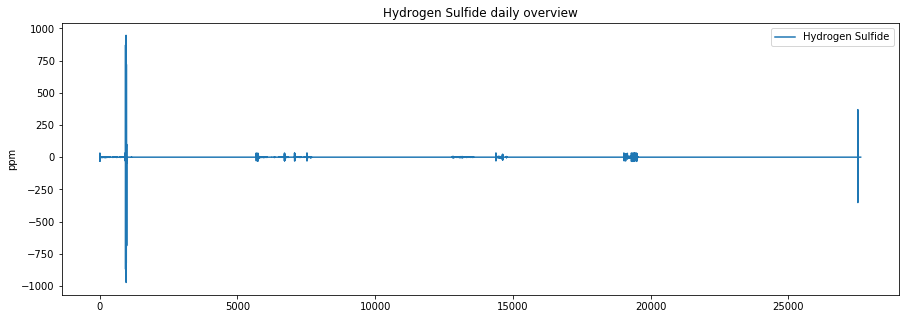

In [70]:
ts = pd.Series(hs_by_day.value,index=hs_by_day.index)
ts.diff().plot(figsize=(15,5), label='Hydrogen Sulfide')
plt.legend(loc='best')
plt.title('Hydrogen Sulfide daily overview')
plt.ylabel('ppm')
plt.show()

plt.savefig('Vol_Hydrogen_Sulfide_daily.png', bbox_inches='tight')

In [71]:
hs_by_day.agg([pd.np.min, pd.np.max, pd.np.mean])

,Time,name,value
amax,2016-10-06 07:32:51,N9,972.670000
amin,2016-08-03 04:39:25,N1,0.000000
mean,NaT,NaN,0.771447


#### Pressure - daily time series overview 

In [72]:
press = data.loc[data['type']=="pressure"]

In [73]:
press_by_day = press.resample('D')

In [74]:
press_by_day = press.reset_index()
del press_by_day['type']

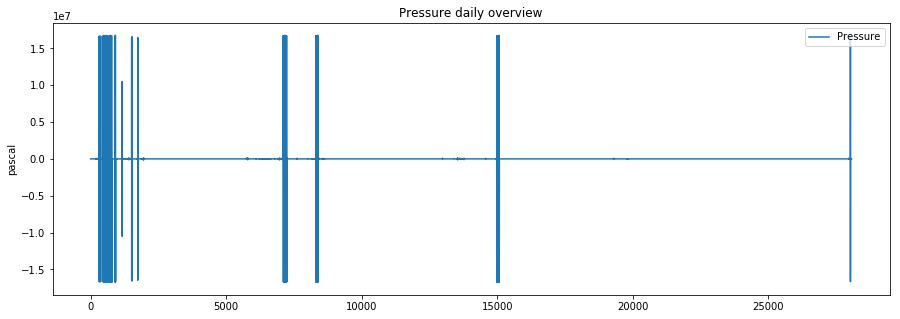

In [75]:
ts = pd.Series(press_by_day.value,index=press_by_day.index)
ts.diff().plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure daily overview')
plt.ylabel('pascal')
plt.show()

plt.savefig('Vol_Pressure_daily.png', bbox_inches='tight')

In [76]:
press_by_day.agg([pd.np.min, pd.np.max, pd.np.mean])

,Time,name,value
amax,2016-10-06 07:32:51,N9,1.677295e+07
amin,2016-08-03 04:39:25,N1,0.000000e+00
mean,NaT,NaN,3.246193e+05


#### Temperature - daily time series overview 

In [77]:
temp = data.loc[data['type']=="temperature"]

In [78]:
temp_by_day = temp.resample('D')

In [79]:
temp_by_day = temp.reset_index()
del temp_by_day['type']

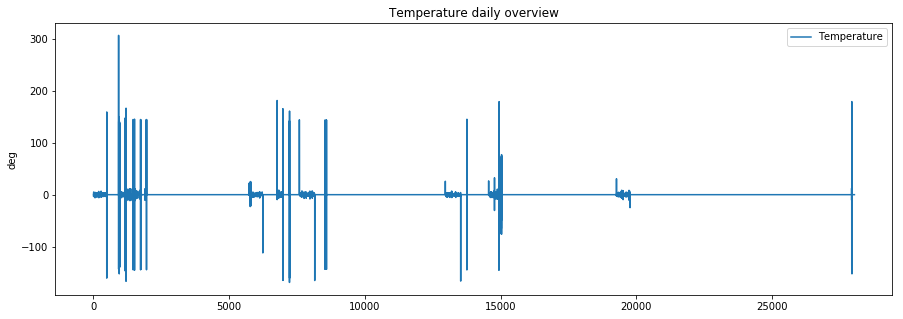

In [80]:
ts = pd.Series(temp_by_day.value,index=temp_by_day.index)
ts.diff().plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature daily overview')
plt.ylabel('deg')
plt.show()

plt.savefig('Vol_Temperature_daily.png', bbox_inches='tight')

In [81]:
press_by_day.agg([pd.np.min, pd.np.max, pd.np.mean])

,Time,name,value
amax,2016-10-06 07:32:51,N9,1.677295e+07
amin,2016-08-03 04:39:25,N1,0.000000e+00
mean,NaT,NaN,3.246193e+05


### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "Corr_plot.JPG" width=450>

In [82]:
data_piv.head()

Time  value                                                \
type                       RSAM battery carbon dioxide concentration humidity   
0    2016-07-01 00:00:31  455.0     NaN                          NaN      NaN   
1    2016-07-01 00:10:02  213.0     NaN                          NaN      NaN   
2    2016-07-01 00:20:00  225.0     NaN                          NaN      NaN   
3    2016-07-01 00:30:01  321.0     NaN                          NaN      NaN   
4    2016-07-01 00:40:00  429.0     NaN                          NaN      NaN   

                                                          
type hydrogen sulfide concentration pressure temperature  
0                               NaN      NaN         NaN  
1                               NaN      NaN         NaN  
2                               NaN      NaN         NaN  
3                               NaN      NaN         NaN  
4                               NaN      NaN         NaN

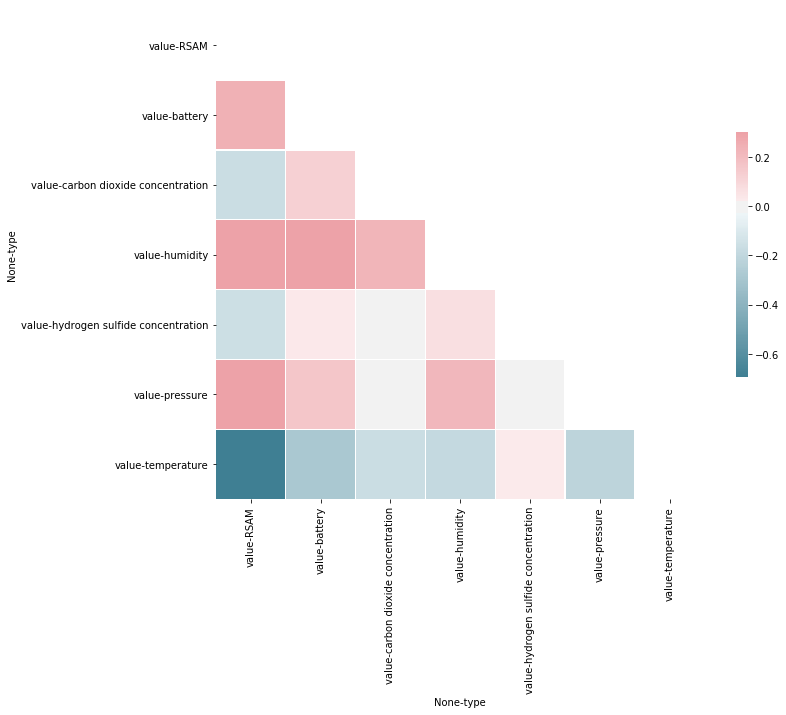

In [83]:
# Compute the correlation matrix
corr = data_piv.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

#### Battery

In [84]:
data_b = data_fin.loc[data_fin['type']=="battery"]

In [85]:
data_b_n1 = data_b.loc[data_b['name']=="N1"]
data_b_n2 = data_b.loc[data_b['name']=="N2"]
data_b_n3 = data_b.loc[data_b['name']=="N3"]
data_b_n4 = data_b.loc[data_b['name']=="N4"]
data_b_n5 = data_b.loc[data_b['name']=="N5"]
data_b_n6 = data_b.loc[data_b['name']=="N6"]
data_b_n7 = data_b.loc[data_b['name']=="N7"]
data_b_n8 = data_b.loc[data_b['name']=="N8"]
data_b_n9 = data_b.loc[data_b['name']=="N9"]
data_b_n10 = data_b.loc[data_b['name']=="N10"]

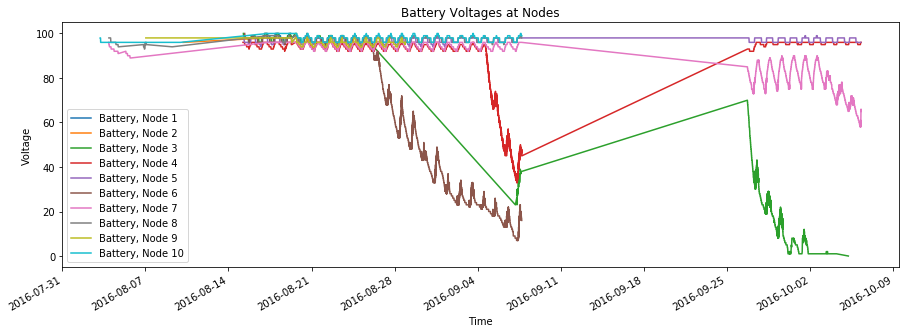

In [86]:
ts1 = pd.Series(data_b_n1.value,index=data_b_n1.index)
ts2 = pd.Series(data_b_n2.value,index=data_b_n2.index)
ts3 = pd.Series(data_b_n3.value,index=data_b_n3.index)
ts4 = pd.Series(data_b_n4.value,index=data_b_n4.index)
ts5 = pd.Series(data_b_n5.value,index=data_b_n5.index)
ts6 = pd.Series(data_b_n6.value,index=data_b_n6.index)
ts7 = pd.Series(data_b_n7.value,index=data_b_n7.index)
ts8 = pd.Series(data_b_n8.value,index=data_b_n8.index)
ts9 = pd.Series(data_b_n9.value,index=data_b_n9.index)
ts10 = pd.Series(data_b_n10.value,index=data_b_n10.index)


ts1.plot(figsize=(15,5), label='Battery, Node 1')
ts2.plot(figsize=(15,5),label='Battery, Node 2')
ts3.plot(figsize=(15,5),label='Battery, Node 3')
ts4.plot(figsize=(15,5),label='Battery, Node 4')
ts5.plot(figsize=(15,5),label='Battery, Node 5')
ts6.plot(figsize=(15,5),label='Battery, Node 6')
ts7.plot(figsize=(15,5),label='Battery, Node 7')
ts8.plot(figsize=(15,5),label='Battery, Node 8')
ts9.plot(figsize=(15,5),label='Battery, Node 9')
ts10.plot(figsize=(15,5),label='Battery, Node 10')

plt.legend(loc='best')
plt.title('Battery Voltages at Nodes')
plt.ylabel('Voltage')
plt.show()

#### Carbon Dioxide

In [87]:
data_co = data_fin.loc[data_fin['type']=="carbon dioxide concentration"]

In [88]:
data_co_n1 = data_co.loc[data_co['name']=="N1"]
data_co_n2 = data_co.loc[data_co['name']=="N2"]
data_co_n3 = data_co.loc[data_co['name']=="N3"]
data_co_n4 = data_co.loc[data_co['name']=="N4"]
data_co_n5 = data_co.loc[data_co['name']=="N5"]
data_co_n6 = data_co.loc[data_co['name']=="N6"]
data_co_n7 = data_co.loc[data_co['name']=="N7"]
data_co_n8 = data_co.loc[data_co['name']=="N8"]
data_co_n9 = data_co.loc[data_co['name']=="N9"]
data_co_n10 = data_co.loc[data_co['name']=="N10"]

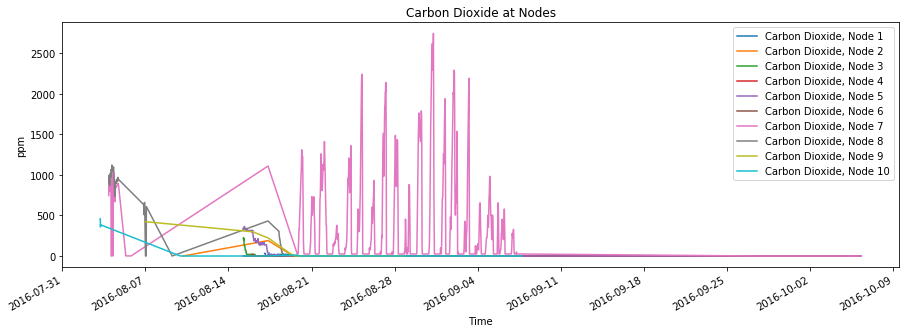

In [89]:
ts1 = pd.Series(data_co_n1.value,index=data_co_n1.index)
ts2 = pd.Series(data_co_n2.value,index=data_co_n2.index)
ts3 = pd.Series(data_co_n3.value,index=data_co_n3.index)
ts4 = pd.Series(data_co_n4.value,index=data_co_n4.index)
ts5 = pd.Series(data_co_n5.value,index=data_co_n5.index)
ts6 = pd.Series(data_co_n6.value,index=data_co_n6.index)
ts7 = pd.Series(data_co_n7.value,index=data_co_n7.index)
ts8 = pd.Series(data_co_n8.value,index=data_co_n8.index)
ts9 = pd.Series(data_co_n9.value,index=data_co_n9.index)
ts10 = pd.Series(data_co_n10.value,index=data_co_n10.index)


ts1.plot(figsize=(15,5), label='Carbon Dioxide, Node 1')
ts2.plot(figsize=(15,5),label='Carbon Dioxide, Node 2')
ts3.plot(figsize=(15,5),label='Carbon Dioxide, Node 3')
ts4.plot(figsize=(15,5),label='Carbon Dioxide, Node 4')
ts5.plot(figsize=(15,5),label='Carbon Dioxide, Node 5')
ts6.plot(figsize=(15,5),label='Carbon Dioxide, Node 6')
ts7.plot(figsize=(15,5),label='Carbon Dioxide, Node 7')
ts8.plot(figsize=(15,5),label='Carbon Dioxide, Node 8')
ts9.plot(figsize=(15,5),label='Carbon Dioxide, Node 9')
ts10.plot(figsize=(15,5),label='Carbon Dioxide, Node 10')

plt.legend(loc='best')
plt.title('Carbon Dioxide at Nodes')
plt.ylabel('ppm')
plt.show()

#### Hydrogen Sulfide

In [90]:
data_hs = data_fin.loc[data_fin['type']=="hydrogen sulfide concentration"]

In [91]:
data_hs_n1 = data_hs.loc[data_hs['name']=="N1"]
data_hs_n2 = data_hs.loc[data_hs['name']=="N2"]
data_hs_n3 = data_hs.loc[data_hs['name']=="N3"]
data_hs_n4 = data_hs.loc[data_hs['name']=="N4"]
data_hs_n5 = data_hs.loc[data_hs['name']=="N5"]
data_hs_n6 = data_hs.loc[data_hs['name']=="N6"]
data_hs_n7 = data_hs.loc[data_hs['name']=="N7"]
data_hs_n8 = data_hs.loc[data_hs['name']=="N8"]
data_hs_n9 = data_hs.loc[data_hs['name']=="N9"]
data_hs_n10 = data_hs.loc[data_hs['name']=="N10"]

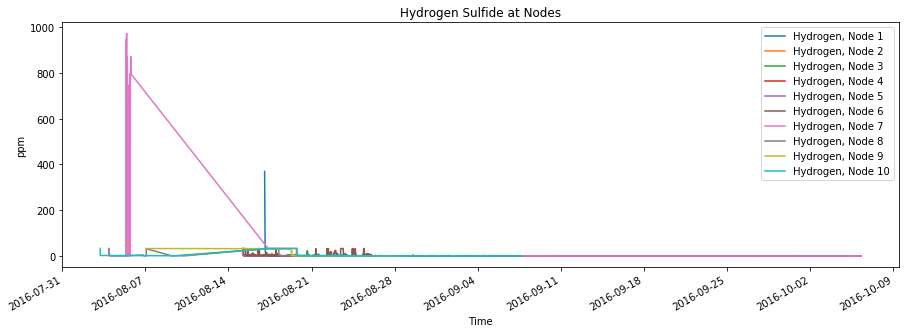

In [92]:
ts1 = pd.Series(data_hs_n1.value,index=data_hs_n1.index)
ts2 = pd.Series(data_hs_n2.value,index=data_hs_n2.index)
ts3 = pd.Series(data_hs_n3.value,index=data_hs_n3.index)
ts4 = pd.Series(data_hs_n4.value,index=data_hs_n4.index)
ts5 = pd.Series(data_hs_n5.value,index=data_hs_n5.index)
ts6 = pd.Series(data_hs_n6.value,index=data_hs_n6.index)
ts7 = pd.Series(data_hs_n7.value,index=data_hs_n7.index)
ts8 = pd.Series(data_hs_n8.value,index=data_hs_n8.index)
ts9 = pd.Series(data_hs_n9.value,index=data_hs_n9.index)
ts10 = pd.Series(data_hs_n10.value,index=data_hs_n10.index)


ts1.plot(figsize=(15,5),label='Hydrogen, Node 1')
ts2.plot(figsize=(15,5),label='Hydrogen, Node 2')
ts3.plot(figsize=(15,5),label='Hydrogen, Node 3')
ts4.plot(figsize=(15,5),label='Hydrogen, Node 4')
ts5.plot(figsize=(15,5),label='Hydrogen, Node 5')
ts6.plot(figsize=(15,5),label='Hydrogen, Node 6')
ts7.plot(figsize=(15,5),label='Hydrogen, Node 7')
ts8.plot(figsize=(15,5),label='Hydrogen, Node 8')
ts9.plot(figsize=(15,5),label='Hydrogen, Node 9')
ts10.plot(figsize=(15,5),label='Hydrogen, Node 10')

plt.legend(loc='best')
plt.title('Hydrogen Sulfide at Nodes')
plt.ylabel('ppm')
plt.show()

#### Pressure

In [93]:
data_p = data_fin.loc[data_fin['type']=="pressure"]

In [94]:
data_p_n1 = data_p.loc[data_p['name']=="N1"]
data_p_n2 = data_p.loc[data_p['name']=="N2"]
data_p_n3 = data_p.loc[data_p['name']=="N3"]
data_p_n4 = data_p.loc[data_p['name']=="N4"]
data_p_n5 = data_p.loc[data_p['name']=="N5"]
data_p_n6 = data_p.loc[data_p['name']=="N6"]
data_p_n7 = data_p.loc[data_p['name']=="N7"]
data_p_n8 = data_p.loc[data_p['name']=="N8"]
data_p_n9 = data_p.loc[data_p['name']=="N9"]
data_p_n10 = data_p.loc[data_p['name']=="N10"]

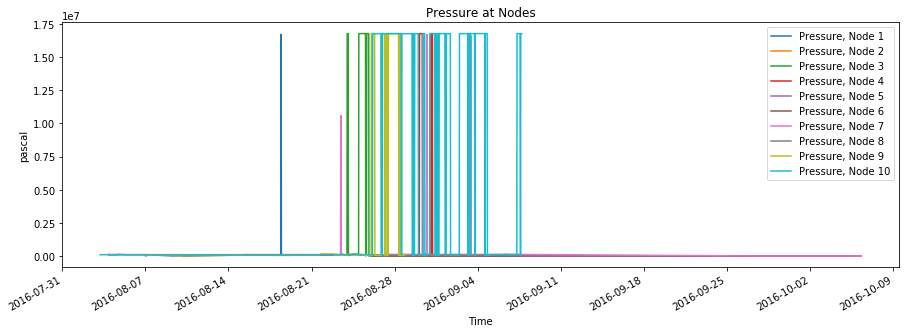

In [95]:
ts1 = pd.Series(data_p_n1.value,index=data_p_n1.index)
ts2 = pd.Series(data_p_n2.value,index=data_p_n2.index)
ts3 = pd.Series(data_p_n3.value,index=data_p_n3.index)
ts4 = pd.Series(data_p_n4.value,index=data_p_n4.index)
ts5 = pd.Series(data_p_n5.value,index=data_p_n5.index)
ts6 = pd.Series(data_p_n6.value,index=data_p_n6.index)
ts7 = pd.Series(data_p_n7.value,index=data_p_n7.index)
ts8 = pd.Series(data_p_n8.value,index=data_p_n8.index)
ts9 = pd.Series(data_p_n9.value,index=data_p_n9.index)
ts10 = pd.Series(data_p_n10.value,index=data_p_n10.index)


ts1.plot(figsize=(15,5),label='Pressure, Node 1')
ts2.plot(figsize=(15,5),label='Pressure, Node 2')
ts3.plot(figsize=(15,5),label='Pressure, Node 3')
ts4.plot(figsize=(15,5),label='Pressure, Node 4')
ts5.plot(figsize=(15,5),label='Pressure, Node 5')
ts6.plot(figsize=(15,5),label='Pressure, Node 6')
ts7.plot(figsize=(15,5),label='Pressure, Node 7')
ts8.plot(figsize=(15,5),label='Pressure, Node 8')
ts9.plot(figsize=(15,5),label='Pressure, Node 9')
ts10.plot(figsize=(15,5),label='Pressure, Node 10')

plt.legend(loc='best')
plt.title('Pressure at Nodes')
plt.ylabel('pascal')
plt.show()

#### Temperature

In [96]:
data_t = data_fin.loc[data_fin['type']=="temperature"]

In [97]:
data_t_n1 = data_t.loc[data_t['name']=="N1"]
data_t_n2 = data_t.loc[data_t['name']=="N2"]
data_t_n3 = data_t.loc[data_t['name']=="N3"]
data_t_n4 = data_t.loc[data_t['name']=="N4"]
data_t_n5 = data_t.loc[data_t['name']=="N5"]
data_t_n6 = data_t.loc[data_t['name']=="N6"]
data_t_n7 = data_t.loc[data_t['name']=="N7"]
data_t_n8 = data_t.loc[data_t['name']=="N8"]
data_t_n9 = data_t.loc[data_t['name']=="N9"]
data_t_n10 = data_t.loc[data_t['name']=="N10"]

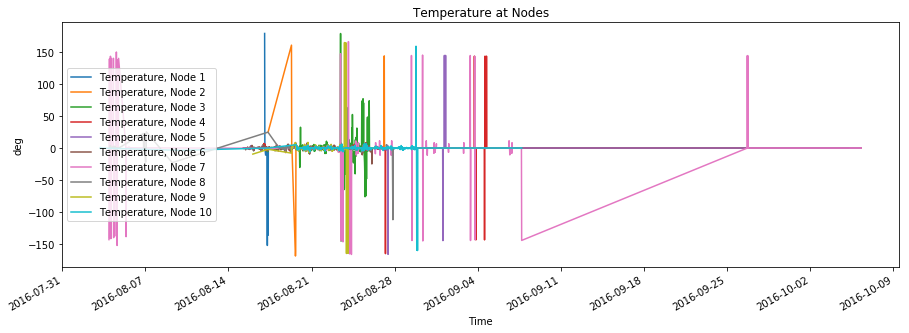

In [98]:
ts1 = pd.Series(data_t_n1.value,index=data_t_n1.index)
ts2 = pd.Series(data_t_n2.value,index=data_t_n2.index)
ts3 = pd.Series(data_t_n3.value,index=data_t_n3.index)
ts4 = pd.Series(data_t_n4.value,index=data_t_n4.index)
ts5 = pd.Series(data_t_n5.value,index=data_t_n5.index)
ts6 = pd.Series(data_t_n6.value,index=data_t_n6.index)
ts7 = pd.Series(data_t_n7.value,index=data_t_n7.index)
ts8 = pd.Series(data_t_n8.value,index=data_t_n8.index)
ts9 = pd.Series(data_t_n9.value,index=data_t_n9.index)
ts10 = pd.Series(data_t_n10.value,index=data_t_n10.index)


ts1.diff().plot(figsize=(15,5),label='Temperature, Node 1')
ts2.diff().plot(figsize=(15,5),label='Temperature, Node 2')
ts3.diff().plot(figsize=(15,5),label='Temperature, Node 3')
ts4.diff().plot(figsize=(15,5),label='Temperature, Node 4')
ts5.diff().plot(figsize=(15,5),label='Temperature, Node 5')
ts6.diff().plot(figsize=(15,5),label='Temperature, Node 6')
ts7.diff().plot(figsize=(15,5),label='Temperature, Node 7')
ts8.diff().plot(figsize=(15,5),label='Temperature, Node 8')
ts9.diff().plot(figsize=(15,5),label='Temperature, Node 9')
ts10.diff().plot(figsize=(15,5),label='Temperature, Node 10')

plt.legend(loc='best')
plt.title('Temperature at Nodes')
plt.ylabel('deg')
plt.show()

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [99]:
data_t = data_fin.loc[data_fin['type']=="temperature"]

In [100]:
data_t_n1 = data_t.loc[data_t['name']=="N1"]
data_t_n2 = data_t.loc[data_t['name']=="N2"]
data_t_n3 = data_t.loc[data_t['name']=="N3"]
data_t_n4 = data_t.loc[data_t['name']=="N4"]
data_t_n5 = data_t.loc[data_t['name']=="N5"]
data_t_n6 = data_t.loc[data_t['name']=="N6"]
data_t_n7 = data_t.loc[data_t['name']=="N7"]
data_t_n8 = data_t.loc[data_t['name']=="N8"]
data_t_n9 = data_t.loc[data_t['name']=="N9"]
data_t_n10 = data_t.loc[data_t['name']=="N10"]

In [101]:
ts1 = pd.Series(data_t_n1.value,index=data_t_n1.index)
ts2 = pd.Series(data_t_n2.value,index=data_t_n2.index)
ts3 = pd.Series(data_t_n3.value,index=data_t_n3.index)
ts4 = pd.Series(data_t_n4.value,index=data_t_n4.index)
ts5 = pd.Series(data_t_n5.value,index=data_t_n5.index)
ts6 = pd.Series(data_t_n6.value,index=data_t_n6.index)
ts7 = pd.Series(data_t_n7.value,index=data_t_n7.index)
ts8 = pd.Series(data_t_n8.value,index=data_t_n8.index)
ts9 = pd.Series(data_t_n9.value,index=data_t_n9.index)
ts10 = pd.Series(data_t_n10.value,index=data_t_n10.index)

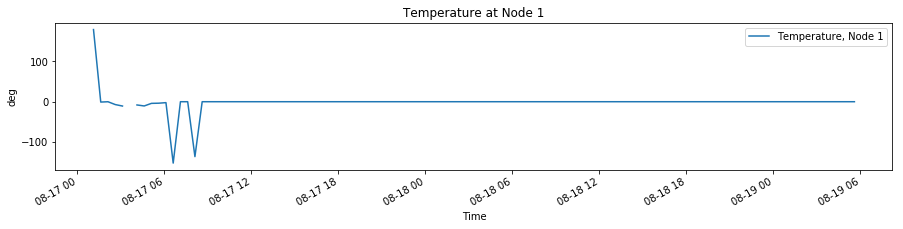

In [105]:
ts1.diff().plot(figsize=(15,3),label='Temperature, Node 1')

plt.legend(loc='best')
plt.title('Temperature at Node 1')
plt.ylabel('deg')
plt.show()

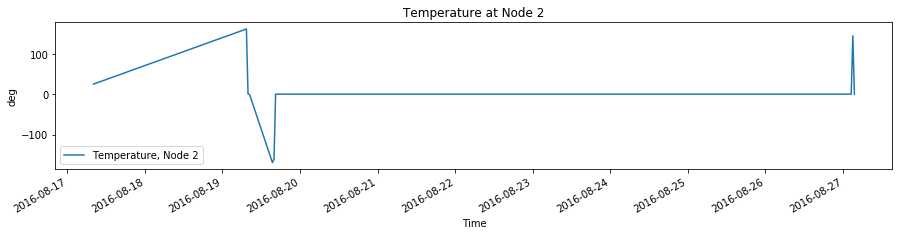

In [106]:
ts2.diff().plot(figsize=(15,3),label='Temperature, Node 2')

plt.legend(loc='best')
plt.title('Temperature at Node 2')
plt.ylabel('deg')
plt.show()

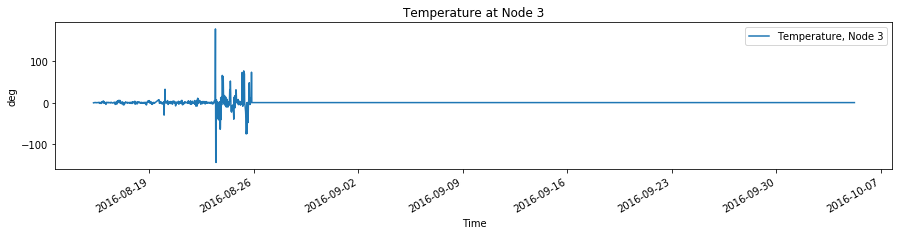

In [107]:
ts3.diff().plot(figsize=(15,3),label='Temperature, Node 3')

plt.legend(loc='best')
plt.title('Temperature at Node 3')
plt.ylabel('deg')
plt.show()

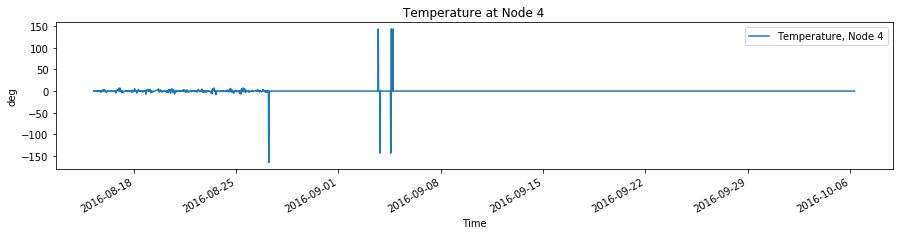

In [108]:
ts4.diff().plot(figsize=(15,3),label='Temperature, Node 4')

plt.legend(loc='best')
plt.title('Temperature at Node 4')
plt.ylabel('deg')
plt.show()

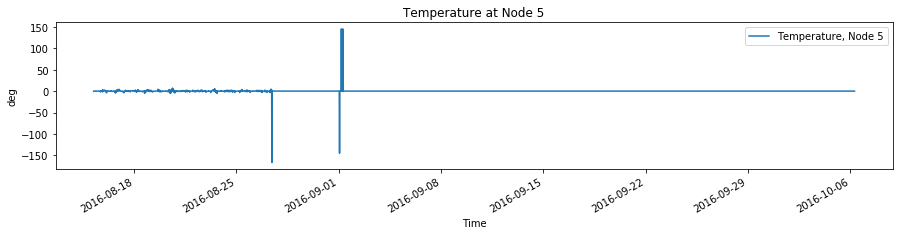

In [109]:
ts5.diff().plot(figsize=(15,3),label='Temperature, Node 5')

plt.legend(loc='best')
plt.title('Temperature at Node 5')
plt.ylabel('deg')
plt.show()

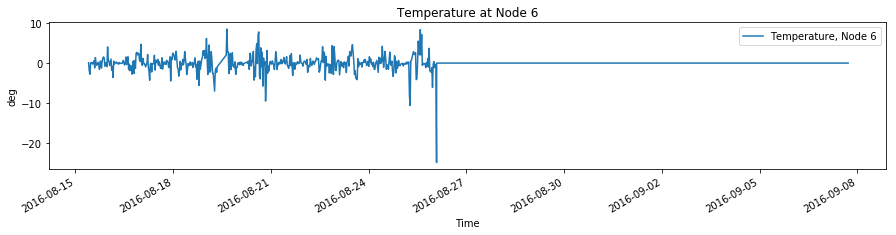

In [110]:
ts6.diff().plot(figsize=(15,3),label='Temperature, Node 6')

plt.legend(loc='best')
plt.title('Temperature at Node 6')
plt.ylabel('deg')
plt.show()

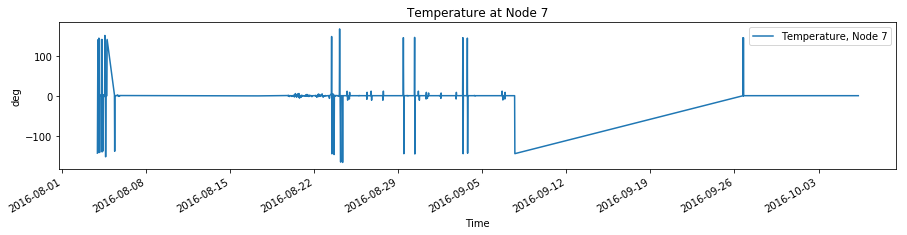

In [111]:
ts7.diff().plot(figsize=(15,3),label='Temperature, Node 7')

plt.legend(loc='best')
plt.title('Temperature at Node 7')
plt.ylabel('deg')
plt.show()

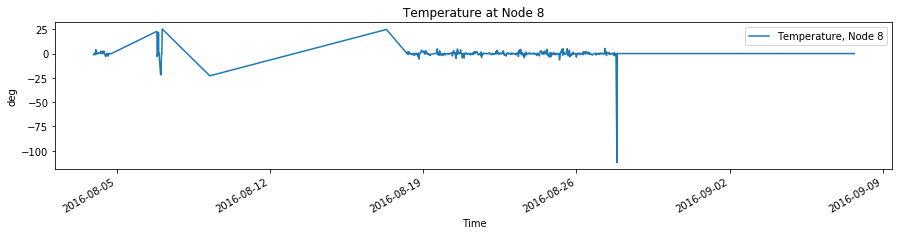

In [112]:
ts8.diff().plot(figsize=(15,3),label='Temperature, Node 8')

plt.legend(loc='best')
plt.title('Temperature at Node 8')
plt.ylabel('deg')
plt.show()

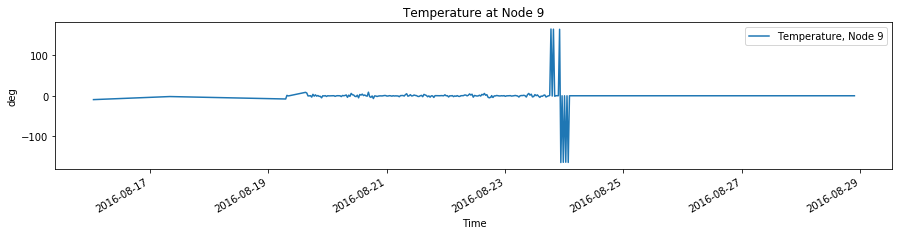

In [113]:
ts9.diff().plot(figsize=(15,3),label='Temperature, Node 9')

plt.legend(loc='best')
plt.title('Temperature at Node 9')
plt.ylabel('deg')
plt.show()

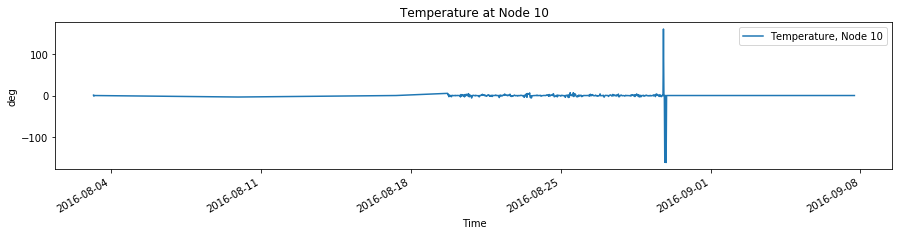

In [114]:
ts10.diff().plot(figsize=(15,3),label='Temperature, Node 10')

plt.legend(loc='best')
plt.title('Temperature at Node 10')
plt.ylabel('deg')
plt.show()

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

Done above

**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [162]:
tdf = data_t.drop_duplicates(subset = ['Time', 'name', 'value'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [163]:
tdf = tdf.reset_index()

In [164]:
tdf.head()

,Time,type,name,value
0,2016-08-03 04:39:25,temperature,N10,29.30
1,2016-08-03 04:47:41,temperature,N10,29.94
2,2016-08-03 05:08:52,temperature,N10,28.61
3,2016-08-03 05:14:08,temperature,N10,28.24
4,2016-08-03 05:28:55,temperature,N10,28.57


In [170]:
temp_df_cor = tdf.pivot(index='Time', columns='name', values='value')

In [171]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [172]:
corr_df = daily_temp_cor_df.corr()

In [173]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


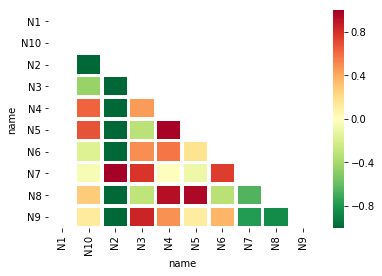

In [174]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [175]:
full2 = data_t.drop_duplicates(subset = ['Time', 'name'], keep='first')

In [176]:
full2 = full2.reset_index()

In [177]:
full_wide = full2.pivot(index='Time', columns='name', values='value')


In [178]:
daily_all_sensors = full_wide.resample('D').mean()

In [179]:
daily_all_sensors.head()

name,N1,N10,N2,N3,N4,N5,N6,N7,N8,N9
Time,,,,,,,,,,
2016-08-03,NaN,29.3,NaN,NaN,NaN,NaN,NaN,164.6,22.19,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.13


**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [188]:
#pd.crosstab(daily_all_sensors['name'])

In [189]:
#nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

In [ ]:
#fullnode = pd.merge(full, nodes, left_on='node_id', right_on='id')

In [190]:
data_fin.columns, data_fin.index

(Index(['type', 'name', 'value'], dtype='object'),
 DatetimeIndex(['2016-08-03 04:39:25', '2016-08-03 04:47:41',
                '2016-08-03 05:08:52', '2016-08-03 05:14:08',
                '2016-08-03 05:28:55', '2016-08-03 05:35:46',
                '2016-08-09 22:43:13', '2016-08-17 07:45:01',
                '2016-08-19 17:23:46', '2016-08-19 21:53:34',
                ...
                '2016-08-31 15:00:00', '2016-08-31 15:50:01',
                '2016-08-31 16:30:00', '2016-08-31 17:20:00',
                '2016-08-31 18:20:00', '2016-08-31 19:00:01',
                '2016-08-31 19:50:00', '2016-08-31 21:00:02',
                '2016-08-31 21:50:00', '2016-08-31 23:00:00'],
               dtype='datetime64[ns]', name='Time', length=176534, freq=None))

In [193]:
data_fin.head()

,type,name,value
Time,,,
2016-08-03 04:39:25,battery,N10,98.0
2016-08-03 04:47:41,battery,N10,98.0
2016-08-03 05:08:52,battery,N10,98.0
2016-08-03 05:14:08,battery,N10,98.0
2016-08-03 05:28:55,battery,N10,96.0


In [191]:
fullnode = data_fin

In [195]:
#fullnode.set_index('Time', inplace=True)

In [200]:
fullnode.resample('D').mean();

In [197]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['Time','name'], columns=['type'], values='value')


In [198]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [221]:
fn_wide.fillna(0, inplace=True)

In [222]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
Time,,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01 00:10:02,RSAM,213.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01 00:20:00,RSAM,225.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01 00:30:01,RSAM,321.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01 00:40:00,RSAM,429.0,0.0,0.0,0.0,0.0,0.0,0.0


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [223]:
lmfn = fn_wide.resample('D').mean()

In [224]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [225]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [226]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [227]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [228]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  -1.0714679138125076
Mean squared error: 670.74
